In [2]:
import tensorflow as tf
from keras.datasets import cifar10
import numpy as np
import numpy.random as nr
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import accuracy_score
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.optimizers import SGD
nc = 10 # Number of classes

In [3]:
(Xtrain, ytrain), (Xtest, ytest) = cifar10.load_data()

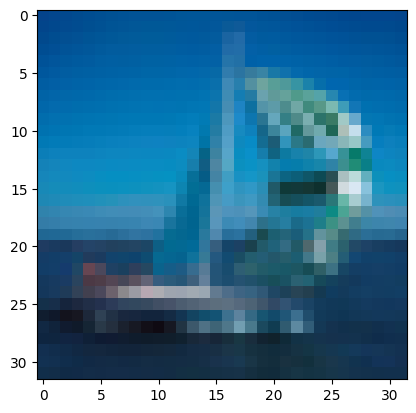

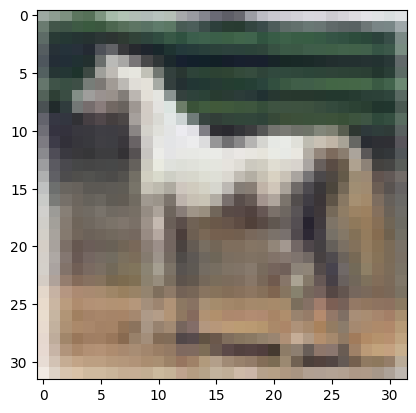

In [4]:
#Show sample images
plt.figure(1)
imgplot1 = plt.imshow(Xtrain[nr.randint(50000)])
plt.show()

plt.figure(2)
imgplot2 = plt.imshow(Xtrain[nr.randint(50000)])
plt.show()

In [5]:
Xtrain = Xtrain.astype('float32')
Xtrain = Xtrain[0:20000,:] / 255.0
Xtest = Xtest.astype('float32')
Xtest = Xtest / 255.0

In [6]:
ytrain = ytrain[:,0]
ytrainEnc = tf.one_hot(ytrain[0:20000], depth=nc)
ytest = ytest[:,0]
ytestEnc = tf.one_hot(ytest, depth=nc)

In [8]:
ytrainEnc.shape

TensorShape([20000, 10])

In [9]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform', padding='same',input_shape=(32,32,3)))
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(10,activation='softmax'))
opt = SGD(learning_rate=0.001,momentum=0.9)
model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
history = model.fit(Xtrain, ytrainEnc, epochs=5, batch_size=550,validation_data=(Xtest, ytestEnc))

Epoch 1/5
37/37 [==============================] - 52s 1s/step - loss: 2.2357 - accuracy: 0.1733 - val_loss: 2.1029 - val_accuracy: 0.2690
Epoch 2/5
37/37 [==============================] - 53s 1s/step - loss: 1.9963 - accuracy: 0.2931 - val_loss: 1.9183 - val_accuracy: 0.3097
Epoch 3/5
37/37 [==============================] - 52s 1s/step - loss: 1.8527 - accuracy: 0.3381 - val_loss: 1.8200 - val_accuracy: 0.3494
Epoch 4/5
37/37 [==============================] - 50s 1s/step - loss: 1.7715 - accuracy: 0.3690 - val_loss: 1.7421 - val_accuracy: 0.3775
Epoch 5/5
37/37 [==============================] - 46s 1s/step - loss: 1.7000 - accuracy: 0.3961 - val_loss: 1.6620 - val_accuracy: 0.4099


In [11]:
ypred = model.predict(Xtest)
ypred = np.argmax(ypred,axis=1)

score = accuracy_score(ypred,ytest)
print('Accuracy score is',100*score,'%')

313/313 [==============================] - 11s 33ms/step
Accuracy score is 40.99 %
